In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks")

(multi-class_logistic_regression)=
# Multi-class Logistic Regression

We demonstrate multi-class logistic regression.

## Handwritten Digits

We will demonstrate multi-class logistic regression using a handwritten digits dataset.
The data are in scikit-learn, and our example follows very closely [this example](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html).

First, let's load the dataset.

In [2]:
from sklearn import datasets

digits = datasets.load_digits()

print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

The images are in a 3D array:

In [3]:
print(digits.images.shape)

(1797, 8, 8)


Each row of this array is an 8x8 image (which is just a matrix).
Here is the first image as just numbers:

In [4]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


These numbers correspond to the darkness of each pixel. The greater the value the darker the pixel.
Here is how we can visualie the first image:

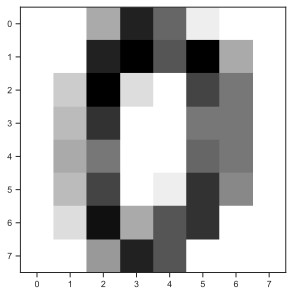

In [5]:
fig, ax = plt.subplots()
ax.imshow(
    digits.images[0],
    cmap=plt.cm.gray_r,
    interpolation='nearest'
);

That's clearly a 0. Now each one of the images comes we predetermined labels that we can use to train models.
Here is where you can find the labels:

In [6]:
print(digits.target)

[0 1 2 ... 8 9 8]


and notice that the first label is a 0, which is great.
Let's now plot several images just to gain some intuition about them:

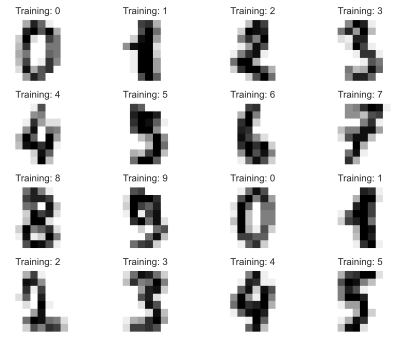

In [7]:
fig, axes = plt.subplots(4, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(
    axes.flatten(),
    images_and_labels[:16]
):
    ax.set_axis_off()
    ax.imshow(
        image,
        cmap=plt.cm.gray_r,
        interpolation='nearest'
    )
    ax.set_title(f'Training: {label}')
plt.tight_layout()
sns.despine(trim=True);

We will apply the multi-class logistic regression classifier with 64 linear features, one per pixel.
First, we will vectorize the images.
We turn them from $8\times 8$ matrices to $64$-dimensional arrays.
Here is how we can do this:

In [8]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
print(data.shape)

(1797, 64)


Let's split the dataset into training and validation sets.
We will use the functionality of scikit-learn for this:

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data,
    digits.target,
    test_size=0.5,
    shuffle=True
)

The model we are going to fit is:

$$
p(y=k|\mathbf{x}, \mathbf{W}) = \operatorname{softmax}_k\left(\mathbf{w}_1^T\mathbf{x},\dots,\mathbf{w}_K^T\mathbf{x}\right),
$$

where $\mathbf{x}$ is the vectorized version of the image.
Let's do it:

In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    max_iter=2000,
    penalty=None,
    fit_intercept=True
)
model.fit(X_train, y_train);

Here is how you can get the matrix of all weights $\mathbf{W}$:

In [12]:
print(model.coef_.shape)

(10, 64)


Here are point predictions for (picking the label with the highest probability):

In [13]:
predicted = model.predict(X_test)
print('#\tTruth\tPrediction')
print('-' * 26)
for i, (yt, yp) in enumerate(zip(y_test, predicted)):
    print(f'{i}\t{yt}\t{yp}')

#	Truth	Prediction
--------------------------
0	6	6
1	6	6
2	7	7
3	2	2
4	1	1
5	8	9
6	0	0
7	7	7
8	5	5
9	1	1
10	7	7
11	5	5
12	8	8
13	6	6
14	5	6
15	1	1
16	7	7
17	0	0
18	0	0
19	7	7
20	2	2
21	0	0
22	1	1
23	7	7
24	1	1
25	8	6
26	2	2
27	6	6
28	4	4
29	4	4
30	4	4
31	7	7
32	5	5
33	8	8
34	6	6
35	5	5
36	8	8
37	4	4
38	0	0
39	6	6
40	5	5
41	3	3
42	1	4
43	4	4
44	7	7
45	0	0
46	9	3
47	6	6
48	5	5
49	7	7
50	2	2
51	1	1
52	1	1
53	8	8
54	8	8
55	6	6
56	0	0
57	5	5
58	9	9
59	7	7
60	5	5
61	8	1
62	6	6
63	1	1
64	1	1
65	7	7
66	3	3
67	8	8
68	2	2
69	3	3
70	0	0
71	9	9
72	5	5
73	4	4
74	3	3
75	5	5
76	0	0
77	6	6
78	5	5
79	1	1
80	3	3
81	4	4
82	1	1
83	1	1
84	2	2
85	5	5
86	8	8
87	5	5
88	2	2
89	1	1
90	8	1
91	8	8
92	6	6
93	0	0
94	1	1
95	8	8
96	5	5
97	1	1
98	6	6
99	1	1
100	7	7
101	2	2
102	7	7
103	9	9
104	2	2
105	4	4
106	7	7
107	1	1
108	5	5
109	6	6
110	5	5
111	3	3
112	1	1
113	6	6
114	1	1
115	2	1
116	4	4
117	6	6
118	0	0
119	4	4
120	8	8
121	2	2
122	4	4
123	2	2
124	7	7
125	1	1
126	7	7
127	3	3
128	8	8
129	1	1
130	5	5
131	0	0
132	1	1


But we can also make probabilistic predictions:

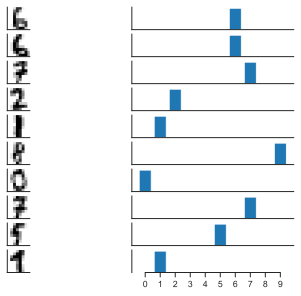

In [15]:
prob_predict = model.predict_proba(X_test)

fig, axes = plt.subplots(10, 2)
for i in range(10):
    axes[i, 0].imshow(
        X_test[i].reshape((8, 8)),
        cmap=plt.cm.gray_r,
        interpolation='nearest'
    )
    axes[i, 0].set_yticks([])
    axes[i, 0].set_xticks([])
    axes[i, 1].set_xticks([])
    axes[i, 1].bar(
        np.arange(10),
        prob_predict[i, :]
    )
    axes[i, 1].set_yticks([])
axes[-1, 1].set_xticks(np.arange(10))
axes[-1, 1].set_xticklabels(model.classes_)
sns.despine(trim=True);

Scikit-learn can run many accuracy metrics at once for you.
Here is everything, including the confusion matrix:

Classification report for model LogisticRegression(max_iter=2000, penalty=None)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       0.84      0.98      0.90        87
           2       0.99      0.90      0.94        83
           3       0.95      0.98      0.96        89
           4       0.96      0.99      0.98        83
           5       0.98      0.94      0.96        90
           6       0.90      1.00      0.95        93
           7       0.98      0.96      0.97        92
           8       0.94      0.81      0.87        99
           9       0.95      0.92      0.94        88

    accuracy                           0.95       899
   macro avg       0.95      0.95      0.95       899
weighted avg       0.95      0.95      0.95       899



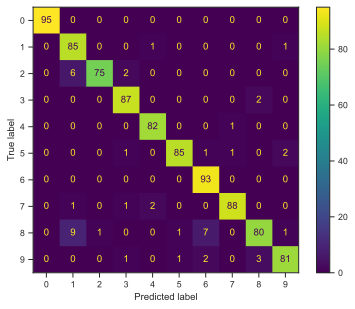

In [16]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print(f"Classification report for model {model}")
print(
    metrics.classification_report(y_test, predicted)
)

cm = confusion_matrix(
    y_test,
    predicted,
    labels=model.classes_
)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=model.classes_
)
disp.plot();

### Questions

+ Look at the precision matrix carefully and identify the digits for which the most mistakes are made. Why does this happen? Write code to visualize some of the wrong predictions.